<a href="https://colab.research.google.com/github/nisarg0/NeuralNetwork/blob/master/alphabetVGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
!gdown --id 126G-cGUz3_jRBgmv8zk8Qp-6tmywUc-X

Downloading...
From: https://drive.google.com/uc?id=126G-cGUz3_jRBgmv8zk8Qp-6tmywUc-X
To: /content/Alphabet Dataset.zip
100% 1.21M/1.21M [00:00<00:00, 80.8MB/s]


In [ ]:
!unzip '/content/Alphabet Dataset.zip'

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]


In [ ]:
train_path = '/content/Alphabet Dataset/Train'
valid_path = '/content/Alphabet Dataset/Test'

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# useful for getting number of classes
folders = 26

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
prediction = Dense(folders, activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy',f1_m,precision_m, recall_m]
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/Alphabet Dataset/Train/',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/Alphabet Dataset/Test/',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 1050 images belonging to 26 classes.
Found 260 images belonging to 26 classes.


In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
17/17 [==============================] - 665s 39s/step - loss: 3.1199 - accuracy: 0.2111 - f1_m: 0.0744 - precision_m: 0.2691 - recall_m: 0.0473 - val_loss: 1.1810 - val_accuracy: 0.6731 - val_f1_m: 0.5627 - val_precision_m: 0.9279 - val_recall_m: 0.4125
Epoch 2/20
17/17 [==============================] - 660s 39s/step - loss: 0.9897 - accuracy: 0.7217 - f1_m: 0.6785 - precision_m: 0.9156 - recall_m: 0.5433 - val_loss: 0.6568 - val_accuracy: 0.8038 - val_f1_m: 0.7928 - val_precision_m: 0.9320 - val_recall_m: 0.6906
Epoch 3/20
17/17 [==============================] - 661s 39s/step - loss: 0.5523 - accuracy: 0.8561 - f1_m: 0.8298 - precision_m: 0.9353 - recall_m: 0.7461 - val_loss: 0.5685 - val_accuracy: 0.7962 - val_f1_m: 0.8475 - val_precision_m: 0.9263 - val_recall_m: 0.7844
Epoch 4/20
17/17 [==============================] - 652s 39s/step - loss: 0.4213 - accuracy: 0.8824 - f1_m: 0.8716 - precision_m: 0.9408 - recall_m: 0.8124 - val_loss: 0.4785 - val_accuracy: 0.8538 - va

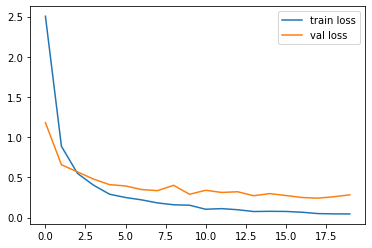

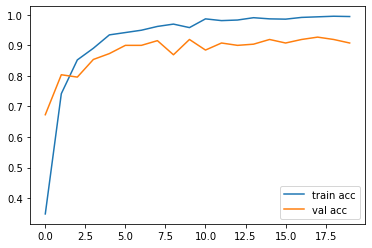

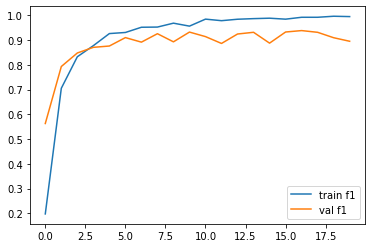

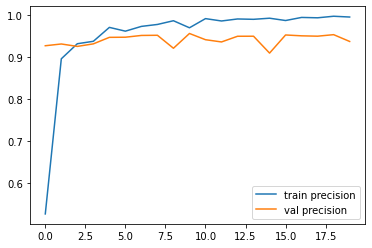

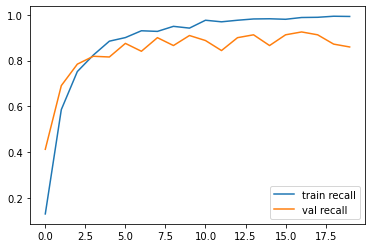

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# f1
plt.plot(r.history['f1_m'], label='train f1')
plt.plot(r.history['val_f1_m'], label='val f1')
plt.legend()
plt.show()
plt.savefig('F1')

# precision
plt.plot(r.history['precision_m'], label='train precision')
plt.plot(r.history['val_precision_m'], label='val precision')
plt.legend()
plt.show()
plt.savefig('Precision')

# f1
plt.plot(r.history['recall_m'], label='train recall')
plt.plot(r.history['val_recall_m'], label='val recall')
plt.legend()
plt.show()
plt.savefig('F1')